Action	Action（五子棋）：\
棋盘大小 10 * 10\
采用强化学习（策略价值网络），用AI训练五子棋AI\
请说明都有哪些模块，不同模块的原理\
		
1、说明有哪些模块（20points）\
2、不同模块的原理（30points）\

AI = Policy Value Network + MCTS\
Policy Value Network，策略价值网络\
策略网络，输入当前的状态，神经网络输出在这个状态下采取每个动作的概率\
价值网络，对于价值网络，当前局面的价值=对终局的估计\
MCTS，蒙特卡洛树搜索\
可以提供很好的策略改善，它的输入是个普通的策略（normal policy），我们可以通过MCTS得到一个更好的策略（good policy）输出\
通过MCTS完成自我对弈，从而更新策略网络

MCTS实现细节：\
节点的定义（通过TreeNode构造树）\
递归的实现，softmax实现，
playout模拟，每次playout模拟前保存状态副本
Policy Value Network实现细节：\
神经网络架构的定义（PyTorch）
训练一步，在进行反向传播之前，需要用zero_grad()清空梯度
loss的定义（loss = value_loss + policy_loss）
神经网络参数的获取，保存，与加载

AI主流程：\
通过MCTS收集自我对弈数据\
通过自我对弈数据，进行Policy Value Network更新\
对当前Policy Value Network进行胜率评估\
判断当前模型的表现，保存最优模型

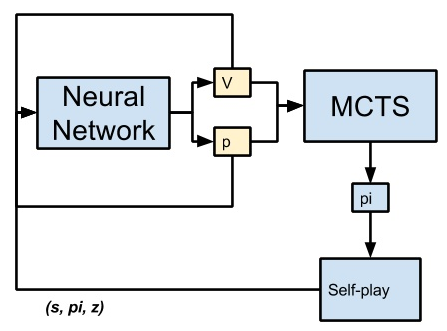

五子棋AI工程：\
game.py，定义了游戏的棋盘、获取棋盘状态，下棋（更新棋盘状态），判断是否有人获胜，绘制棋盘，两个player对弈，自我对弈\
human_play.py，人机对弈，人来输入下棋位置，调用AI进行对战\
mcts_alphaZero.py，实现AlphaGo Zero中的MCTS（蒙特卡洛树搜索），使用了策略网络来指导树搜索并计算叶节点\
mcts_pure.py，实现了随机走子策略的MCTS（蒙特卡洛树搜索）\
policy_value_net_pytorch.py，策略价值网络，用来指导MCTS搜索并计算叶子节点\
train.py，训练AI主程序